In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [36]:
rlipp_df = pd.read_csv('../result/rlipp.out', sep='\t')
nest_df = pd.read_csv('../data/nest_map.csv', sep=',')
nest_map = {row['name'].replace('.', '-'):row['Annotation'] for i, row in nest_df.iterrows()}
nest_h_map = {row['name'].replace('.', '-'):row['Main Hallmark'] for i, row in nest_df.iterrows()}

In [24]:
def create_manhattan_plt(score_list, x_label, y_label, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.bar(score_list.keys(), score_list.values(), width=1.0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.xticks(rotation=75)
    plt.show()
    return fig

In [34]:
def get_top_systems(drug, drug_name):
    score_list = {}
    for i, row in rlipp_df.iterrows():
        if row['Drug'] == drug:
            score_list[row['Term']] = (row['RLIPP'])
    score_list = {term:rlipp for term,rlipp in sorted(score_list.items(), key=lambda item:item[1], reverse=True)}
    top_scores = {}
    subsys_df = pd.DataFrame()
    for i,key in enumerate(score_list):
        if i < 5:
            top_scores[nest_map[key]] = score_list[key]
        subsys_df = subsys_df.append({'Rank' : (i+1), 'Term' : key, 'RLIPP Score' : score_list[key], 'Name' : nest_map[key], 'Type' : nest_h_map[key]}, ignore_index = True)
        
    fig = create_manhattan_plt(top_scores, 'Top 5 subsystems', 'RLIPP score', drug_name)
    return top_scores, subsys_df, fig

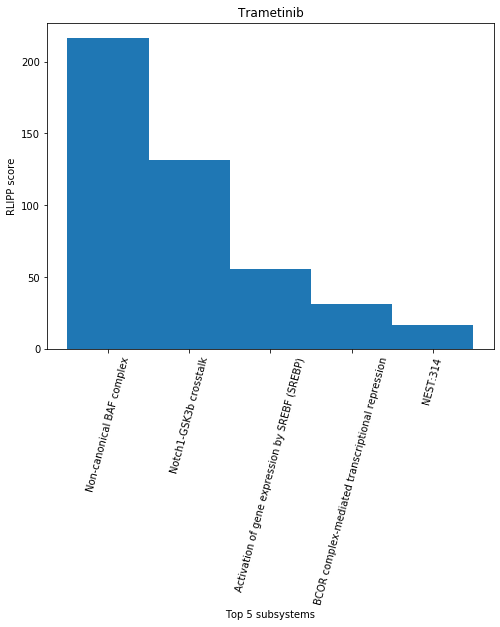

In [25]:
drug = 'CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(C(=O)N2C4=CC(=CC=C4)NC(=O)C)C5CC5'
top_scores, subsys_df, fig = get_top_systems(drug, 'Trametinib')

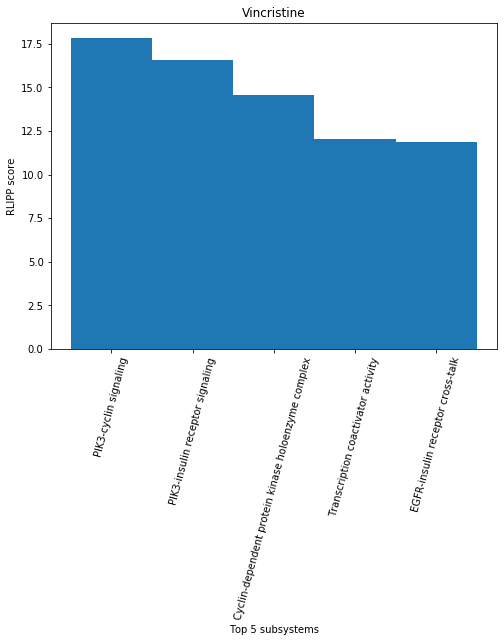

In [26]:
drug = 'CC[C@@]1(C[C@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)[C@]78CCN9[C@H]7[C@@](C=CC9)([C@H]([C@@]([C@@H]8N6C=O)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O'
top_scores, subsys_df, fig = get_top_systems(drug, 'Vincristine')

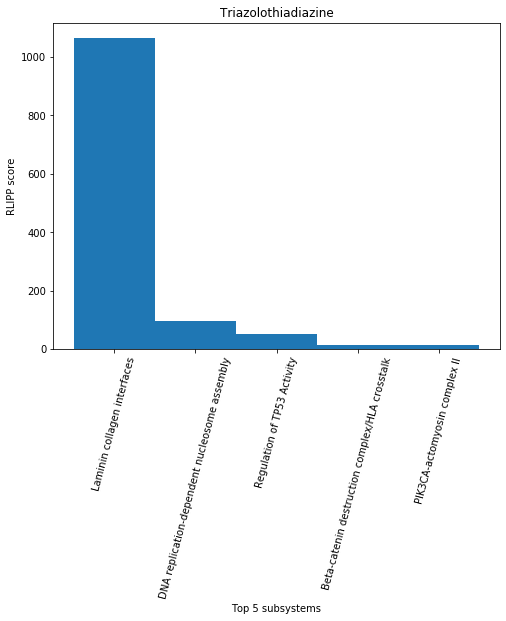

In [27]:
drug = 'COC1=CC(=C(C=C1)OC)C2=NN=C3N2N=C(CS3)C4=CC(=C(C=C4)OC)OC'
top_scores, subsys_df, fig = get_top_systems(drug, 'Triazolothiadiazine')

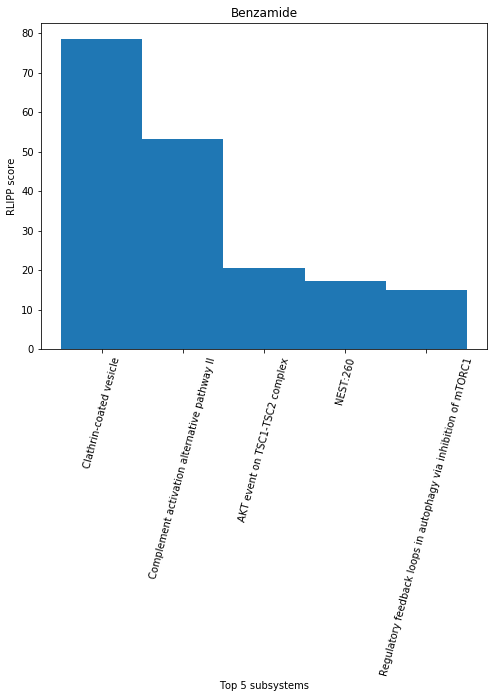

In [28]:
drug = 'C1=CC(=C(C=C1I)F)NC2=C(C(=C(C=C2C(=O)NOCC(CO)O)Br)F)F'
top_scores, subsys_df, fig = get_top_systems(drug, 'Benzamide')

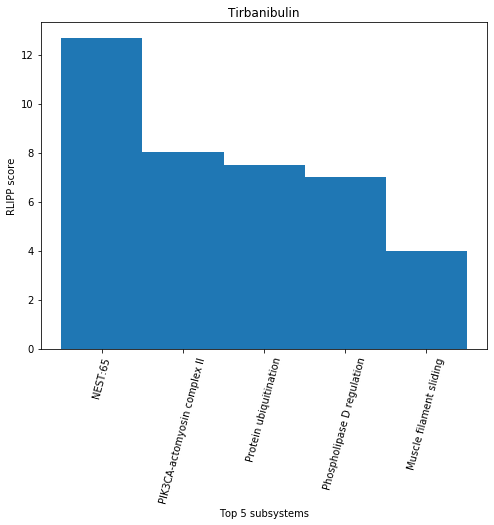

In [29]:
drug = 'C1COCCN1CCOC2=CC=C(C=C2)C3=CN=C(C=C3)CC(=O)NCC4=CC=CC=C4'
top_scores, subsys_df, fig = get_top_systems(drug, 'Tirbanibulin')

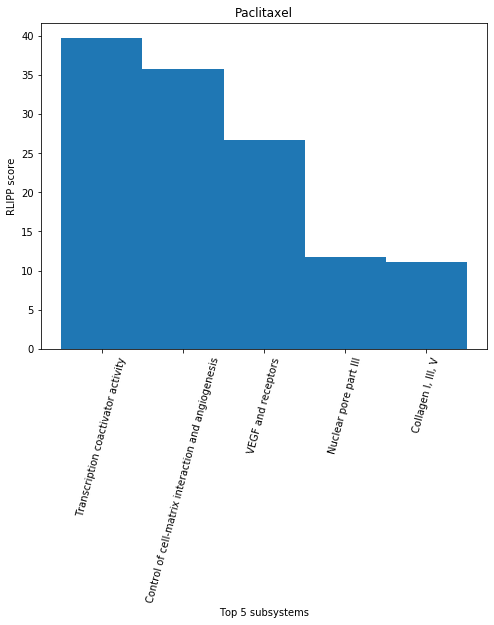

In [37]:
drug = 'CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@](C3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C'
top_scores, subsys_df, fig = get_top_systems(drug, 'Paclitaxel')

In [41]:
subsys_df.to_csv('../plots/paclitaxel_subsystems.csv', index=False)